<a href="https://colab.research.google.com/github/AllenHichard/Analise_Algoritmos/blob/main/MergeXQuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algoritmos

In [50]:
def merge(array, left_array, right_array):
    li = 0
    ri = 0
    for index in range(0, len(array)):
        if li >= len(left_array):
            array[index] = right_array[ri]
            ri += 1
        elif ri >= len(right_array):
            array[index] = left_array[li]
            li += 1
        elif left_array[li] < right_array[ri]:
            array[index] = left_array[li]
            li += 1
        else:
            array[index] = right_array[ri]
            ri += 1

def merge_sort(array):
    if len(array) <= 1: return
    left_array = array[:len(array)//2]
    right_array = array[len(array)//2:]
    merge_sort(left_array)
    merge_sort(right_array)
    merge(array, left_array, right_array)
    return array #não deste retorno, coloquei apenas para sinalização


def lomuto_partition(A, l, r):
    p = A[r]
    s = l - 1
    for i in range(l, r):
        if A[i] < p:
            s += 1
            A[s], A[i] = A[i], A[s]
    A[r], A[s+1] = A[s+1], A[r]
    return s + 1

def quick_sort_lomuto(array):
    quicksort_lomuto(array, 0, len(array) - 1)


def quicksort_lomuto(array, i, j):
    if i>=j: return
    l = lomuto_partition(array,i,j)
    quicksort_lomuto(array, i, l-1) # Com o For não precisa do -1
    quicksort_lomuto(array, l+1, j)



def hoares_partition(array, i, j):
    l = i
    p = j
    r = j-1
    while l<=r:
        while l<=r and array[l]<array[p]:
            l += 1
        while l<=r and array[r]>array[p]:
            r -= 1
        if l<= r:
            array[l],array[r]=array[r],array[l]
            l+=1
            r-=1
    array[l], array[p] = array[p], array[l]
    return l

def quicksort_hoares(array, i, j):
    if i>=j: return
    l = hoares_partition(array,i,j)
    quicksort_hoares(array, i, l-1) # Sem o For precisa do -1
    quicksort_hoares(array, l+1, j)

def quick_sort_hoares(array):
    quicksort_hoares(array, 0, len(array)-1)

#x = 50000
#print(random.randint(x+1000, size=x))

#import time

#x = 500000
#vetor1 = [random.randint(0, 1000) for _ in range(x)]
#vetor1 = list(random.randint(x+1000, size=x))
#vetor2 = vetor1.copy()
#teste = vetor1.copy()

#start = time.time()
#quick_sort_lomuto(vetor1)
#end = time.time()
#print(end-start)

#start = time.time()
#quick_sort_hoares(vetor2)
#end = time.time()
#print(end-start)



  

Coleta de dados dos experimentos

In [54]:
import time
from numpy import random
DOMAIN = 10000 ##Você deve escolher um valor mais adequado
def avg_time(domain, tam, func, rounds, test = False): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L= list(random.randint(domain, size=tam))
    #L = [random.randint(0, domain) for _ in range(tam)]
    start = time.time()    
    func(L) 
    end = time.time()
    sum += end-start
    #if test:
      #assert L == sorted(L)
  return sum/rounds

#defines the algorithms to be processed
algorithms = [merge_sort, quick_sort_lomuto, quick_sort_hoares]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 20

sizes = [100000,200000,300000,400000,500000] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting experiments for datasets with size={sizes[i]}, each experiment has {num_rounds} rounds.")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds, True)
  
print(f"Finish data collection")

Starting experiments for datasets with size=100000, each experiment has 20 rounds.
Starting experiments for datasets with size=200000, each experiment has 20 rounds.
Starting experiments for datasets with size=300000, each experiment has 20 rounds.
Starting experiments for datasets with size=400000, each experiment has 20 rounds.
Starting experiments for datasets with size=500000, each experiment has 20 rounds.
Finish data collection


Formata os dados do experimento para serem exibidos

In [55]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
merge_sort##100000,0.784139,merge_sort,100000
quick_sort_lomuto##100000,0.452135,quick_sort_lomuto,100000
quick_sort_hoares##100000,0.470050,quick_sort_hoares,100000
merge_sort##200000,1.689587,merge_sort,200000
quick_sort_lomuto##200000,1.027213,quick_sort_lomuto,200000
quick_sort_hoares##200000,1.025946,quick_sort_hoares,200000
merge_sort##300000,2.631539,merge_sort,300000
quick_sort_lomuto##300000,1.720712,quick_sort_lomuto,300000
quick_sort_hoares##300000,1.623651,quick_sort_hoares,300000
merge_sort##400000,3.588914,merge_sort,400000


Resultado do experimento (gráfico)

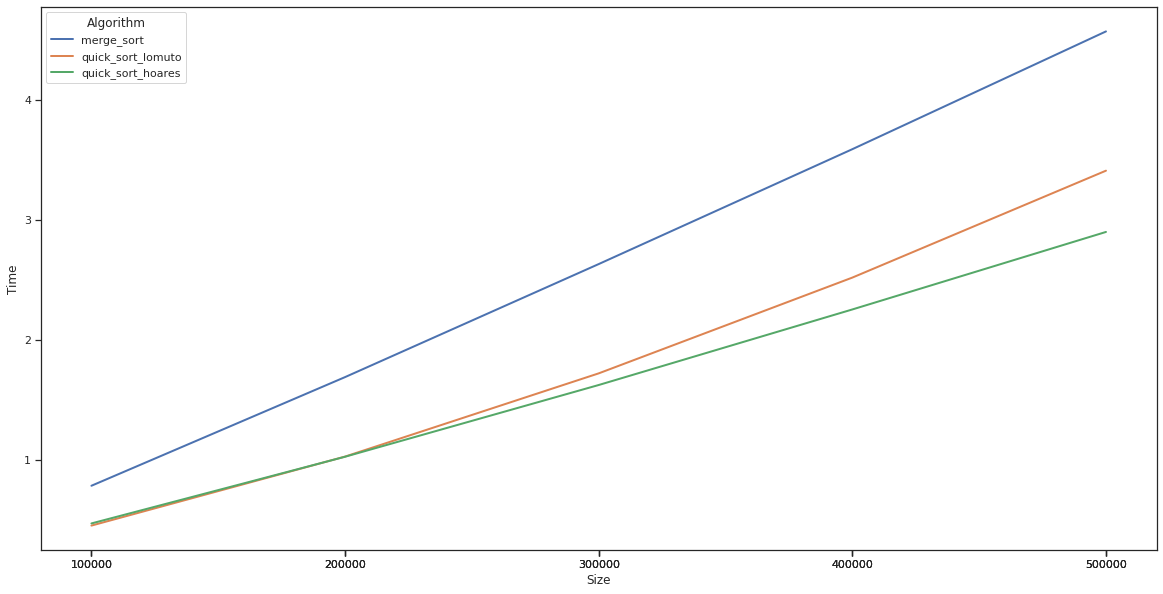

In [58]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()